In [1]:
conda create --name env_name --file requirements.txt python=3.8.

Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - nbdev[version='>=0.2.12']
  - fastai[version='>=2.0.0']
  - azure-cognitiveservices-search-imagesearch
  - sentencepiece
  - scikit_learn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
conda install pytorch==1.6.0 torchvision==0.7.0 -c pytorch

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: Could not find a version that satisfies the requirement torchvision<0.9,>=0.8 (from fastai>=2.1->fastbook) (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.5.0)
ERROR: No matching distribution found for torchvision<0.9,>=0.8 (from fastai>=2.1->fastbook)


ModuleNotFoundError: No module named 'fastbook'

In [2]:
from fastbook import *

ModuleNotFoundError: No module named 'fastbook'

In [75]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [15]:
path = Path('monkey_dataset')

In [16]:
path.ls()

(#984) [Path('monkey_dataset/n8148.jpg'),Path('monkey_dataset/n8048.jpg'),Path('monkey_dataset/n4131.jpg'),Path('monkey_dataset/n2052.jpg'),Path('monkey_dataset/n9023.jpg'),Path('monkey_dataset/n5152.jpg'),Path('monkey_dataset/n1130.jpg'),Path('monkey_dataset/n8069.jpg'),Path('monkey_dataset/n3070.jpg'),Path('monkey_dataset/n0118.jpg')...]

In [17]:
path.ls()[0]

Path('monkey_dataset/n8148.jpg')

In [39]:
Path.BASE_PATH = path

In [21]:
path.ls()[0]

Path('n8148.jpg')

In [34]:
fname = path.ls()

In [24]:
print(fname[0].name[1])

8


In [37]:
def label_func(fname):
    if(fname.name[1] == '0'): return "mantled_howler"
    elif(fname.name[1] == '1'): return "patas_monkey"
    elif(fname.name[1] == '2'): return "bald_uakari"
    elif(fname.name[1] == '3'): return "japanese_macaque"
    elif(fname.name[1] == '4'): return "pygmy_marmoset"
    elif(fname.name[1] == '5'): return "white_headed_capuchin"
    elif(fname.name[1] == '6'): return "silvery_marmoset"
    elif(fname.name[1] == '7'): return "common_squirrel_monkey"
    elif(fname.name[1] == '8'): return "black_headed_night_monkey"
    elif(fname.name[1] == '9'): return "nilgiri_langur"
    else: return "Unknown type" #should not happen

In [38]:
label_func(fname[0])

'black_headed_night_monkey'

In [42]:
monkeys = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(seed=42),
                    get_y=label_func,
                    item_tfms=Resize(460),
                    batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = monkeys.dataloaders(path)

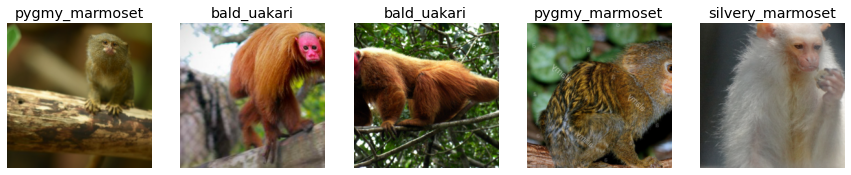

In [43]:
dls.show_batch(nrows=1, ncols=5)

In [45]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.205851,0.145377,0.051020,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.284682,0.038819,0.005102,00:11
1,0.201173,0.039091,0.010204,00:12


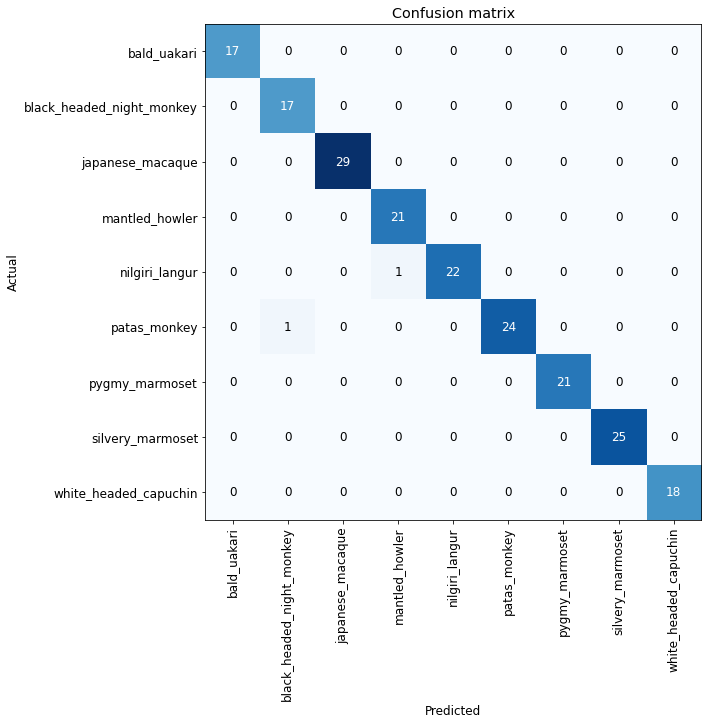

In [47]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [49]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,0.715832,2.133864,0.112245,00:13


epoch,train_loss,valid_loss,error_rate,time
0,1.903526,677.482483,0.806122,00:12
1,1.566696,2083.504150,0.862245,00:13
2,1.460260,126.108658,0.841837,00:12
3,1.234607,3.401954,0.193878,00:12
4,1.022253,0.300133,0.102041,00:11


In [50]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,0.814779,1.680644,0.137755,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.116640,55.049706,0.561224,00:11
1,1.340596,59.563141,0.561224,00:12
2,1.217255,18.827332,0.571429,00:11
3,1.085684,0.502465,0.086735,00:12
4,0.894065,0.235382,0.076531,00:11


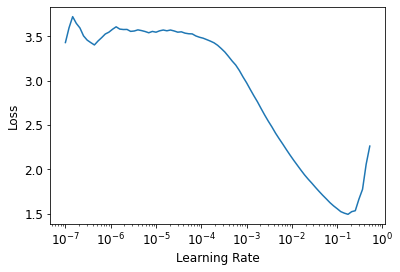

In [51]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [52]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.74e-02, steepest point: 1.74e-03


In [54]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=2e-03)

epoch,train_loss,valid_loss,error_rate,time
0,2.237839,0.109445,0.015306,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.302648,0.064384,0.015306,00:12
1,0.181684,0.033812,0.015306,00:12
2,0.137808,0.033088,0.015306,00:13
3,0.103162,0.035558,0.015306,00:12
4,0.086535,0.035308,0.015306,00:13


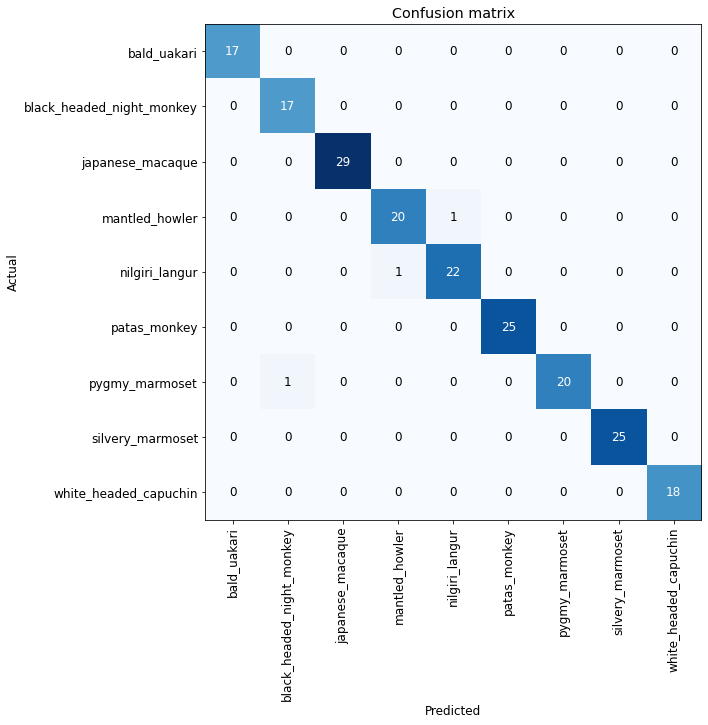

In [55]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

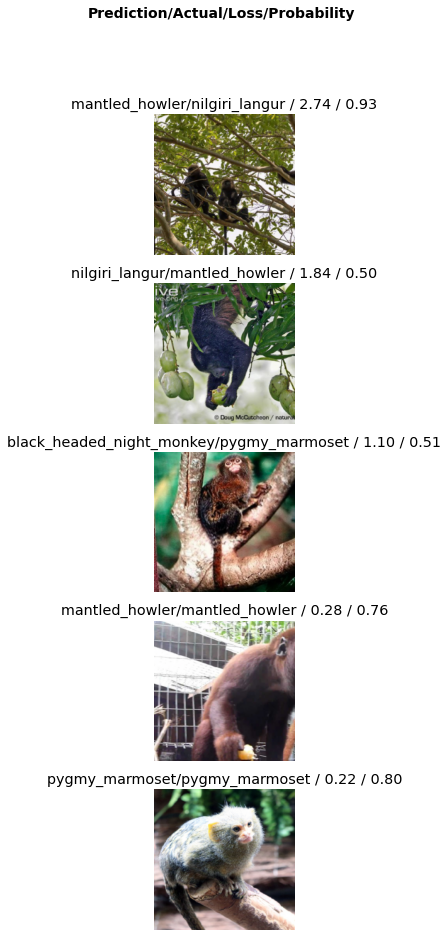

In [58]:
interp.plot_top_losses(5, nrows=5)

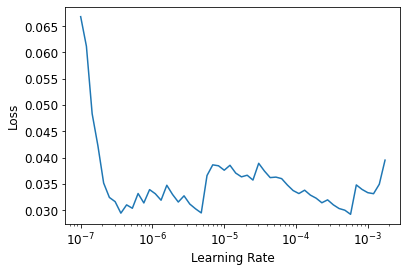

In [59]:
lr_min,lr_steep = learn.lr_find()

In [60]:
learn.unfreeze()

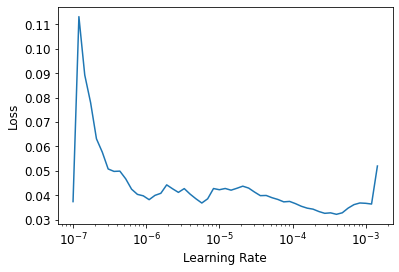

In [61]:
lr_min,lr_steep = learn.lr_find()

In [62]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 3.98e-05, steepest point: 3.31e-06


In [63]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=3e-06)

epoch,train_loss,valid_loss,error_rate,time
0,3.586958,2.701494,0.867347,00:12


epoch,train_loss,valid_loss,error_rate,time
0,3.602824,2.630512,0.857143,00:12
1,3.620391,2.621848,0.857143,00:12
2,3.570652,2.589581,0.862245,00:12
3,3.587890,2.586839,0.852041,00:13
4,3.610827,2.599411,0.857143,00:12


In [64]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=3e-07)

epoch,train_loss,valid_loss,error_rate,time
0,3.397165,2.634359,0.862245,00:12


epoch,train_loss,valid_loss,error_rate,time
0,3.328957,2.609960,0.903061,00:12
1,3.395534,2.603918,0.892857,00:13
2,3.373035,2.614388,0.877551,00:12
3,3.405651,2.615854,0.867347,00:12
4,3.412957,2.610142,0.887755,00:13


In [65]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=1e-05)

epoch,train_loss,valid_loss,error_rate,time
0,3.565358,2.686666,0.877551,00:13


epoch,train_loss,valid_loss,error_rate,time
0,3.542588,2.709916,0.897959,00:12
1,3.543139,2.676112,0.903061,00:12
2,3.448867,2.624087,0.887755,00:12
3,3.376065,2.611561,0.887755,00:12
4,3.313689,2.609920,0.882653,00:12


In [66]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=2e-07)

epoch,train_loss,valid_loss,error_rate,time
0,3.252261,2.592462,0.811224,00:12


epoch,train_loss,valid_loss,error_rate,time
0,3.388916,2.374996,0.775510,00:13
1,3.356210,2.359144,0.780612,00:12
2,3.314188,2.377802,0.780612,00:13
3,3.325021,2.382880,0.770408,00:12
4,3.310542,2.372833,0.770408,00:12


In [67]:
learn_fianl = cnn_learner(dls, resnet18, metrics=error_rate)
#learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.916076,0.148922,0.051020,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.272184,0.098974,0.020408,00:12


In [71]:
learn_final = cnn_learner(dls, resnet18, metrics=error_rate)
learn_final.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.161381,0.128683,0.020408,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.345449,0.050432,0.010204,00:12
1,0.239220,0.058336,0.015306,00:11
2,0.174375,0.041350,0.015306,00:12
3,0.135307,0.034874,0.010204,00:11
4,0.110099,0.033987,0.010204,00:11


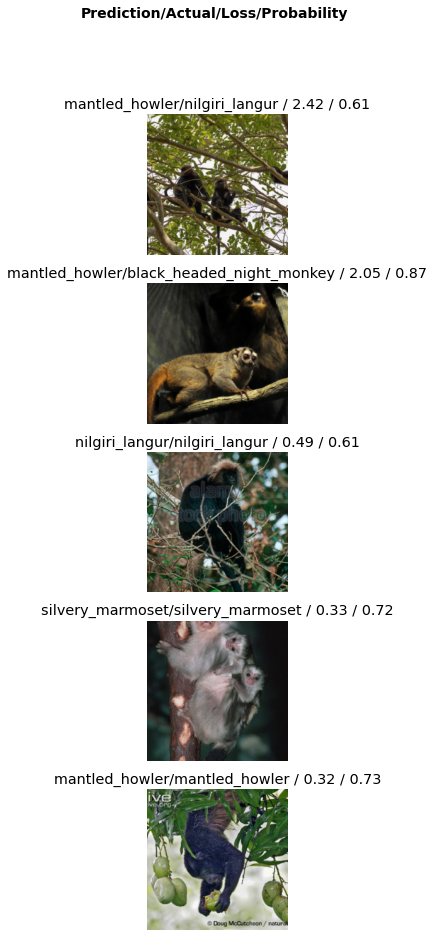

In [74]:
interp = ClassificationInterpretation.from_learner(learn_final)
interp.plot_top_losses(5,nrows=5)

In [77]:
cleaner = ImageClassifierCleaner(learn_final)
cleaner

### Creating UI

In [78]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [92]:
img = PILImage.create(btn_upload.data[-1])


AttributeError: 'bytes' object has no attribute 'name'

In [82]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [84]:
pred,pred_idx,probs = learn_final.predict(img)

In [139]:
lbl_pred = widgets.Label()
lbl_pred2 = widgets.Label()
lbl_pred.value = f'Prediction: {pred} '
lbl_pred2.value = f'Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: pygmy_marmoset ')

In [140]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [141]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(148,148))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}\n Probability: {probs[pred_idx]:.04f}'
    lbl_pred2.value = f'Prediction: {pred}\n Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [142]:
btn_upload = widgets.FileUpload()

In [143]:
VBox([widgets.Label('Welcome! Please upload an image of a monkey to classify the breed!'), 
      btn_upload, btn_run, out_pl, lbl_pred,lbl_pred2])

In [148]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.9 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 188 kB 19.3 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 428 kB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.0 MB/s  eta 0:00:01
ERROR: nbdev 1.1.5 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: nbconvert 6.0.7 has requirement nbclient<0.6.0,>=0.5.0, but you'll have nbclient 0.4.0 which is incompatible.
ERROR: jupyterlab-git 0.10.1 has requirement nbdime<2.0.0,>=1.1.0, but you'll have nbdime 2.0.0 which is incompatible.
  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.